importing necessary libraries

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

Loading and analysing file

In [57]:
df=pd.read_csv("/content/drive/MyDrive/churn-dataset.csv")

In [58]:
df.shape

(7043, 21)

In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [60]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.isnull().sum() #checking for nulls

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [62]:
df.isna().sum() #checking for NA values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


Data Preprocessing

In [64]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
processed_df = df.apply(lambda x: encoder.fit_transform(x) if x.dtype == 'object' else x)
processed_df.head().T

,0,1,2,3,4
customerID,5375.00,3962.00,2564.00,5535.0,6511.0
gender,0.00,1.00,1.00,1.0,0.0
SeniorCitizen,0.00,0.00,0.00,0.0,0.0
Partner,1.00,0.00,0.00,0.0,0.0
Dependents,0.00,0.00,0.00,0.0,0.0
tenure,1.00,34.00,2.00,45.0,2.0
PhoneService,0.00,1.00,1.00,0.0,1.0
MultipleLines,1.00,0.00,0.00,1.0,0.0
InternetService,0.00,0.00,0.00,0.0,1.0
OnlineSecurity,0.00,2.00,2.00,2.0,0.0


In [65]:
processed_df.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [66]:
processed_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Spliting Dataset into train and test subset

In [67]:
x = processed_df.drop(columns=["Churn"])
y = processed_df["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

Building a logistic Regression Model

In [68]:
#Logistic Regression model
logistic_model = LogisticRegression(random_state=0, max_iter=1000)
logistic_model.fit(x_train, y_train)
predict = logistic_model.predict(x_test)
logistic_accuracy_score = accuracy_score(predict,y_test)

Evaluating Accuray, Precision, Recall and F1 Scores

In [69]:
print("The accuracy score is: ", logistic_accuracy_score)

The accuracy score is:  0.787052810902896


In [70]:
precision = precision_score(y_test, predict)
print('Precision: %.3f' % precision)

Precision: 0.622


In [71]:
recall = recall_score(y_test, predict)
print('Recall: %.3f' % recall)

Recall: 0.558


In [72]:
from sklearn.metrics import f1_score
score = f1_score(y_test, predict)
print('F-Measure: %.3f' % score)

F-Measure: 0.588


Fine Tuning Model:



*   Searching for Best Hyperparameters Using Grid Search



In [73]:
from sklearn.model_selection import GridSearchCV
# define the hyperparameters to search over
hyperparams = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# create a logistic regression model
clf = LogisticRegression()

In [74]:
grid_search = GridSearchCV(clf, hyperparams, scoring='f1')
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

* Getting Hyperparameters

In [75]:
# print the best hyperparameters found by the grid search
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}


* Training Model with best Hyperparameters

In [76]:
# train the model on the training set with the best hyperparameters
best_clf = LogisticRegression(**grid_search.best_params_)
best_clf.fit(x_train, y_train)

# make predictions on the test set
y_pred = best_clf.predict(x_test)

* Evaluating Accuracy, Precision, Recall and F1 Scores on Best Model

In [77]:
# calculate precision, recall, and F1 score on the test set
fine_accuracy=accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", fine_accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.787052810902896
Precision: 0.6218097447795824
Recall: 0.5583333333333333
F1 score: 0.5883644346871569


Visiualizing Performace Using Confusion Matrix

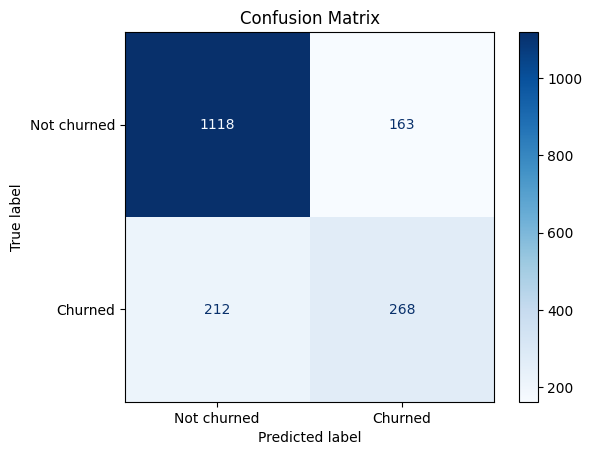

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not churned', 'Churned'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Visiualizing Performace Using ROC Curve

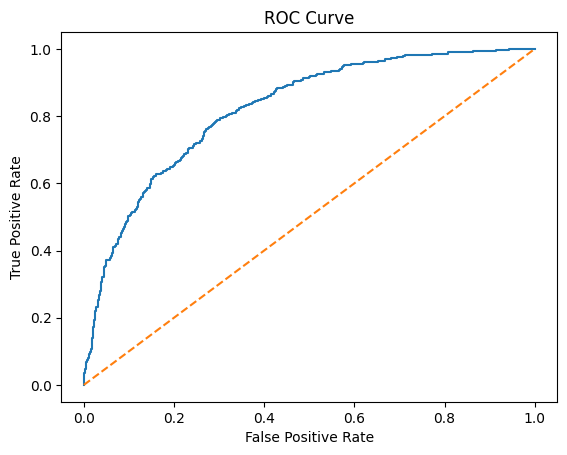

In [79]:
from sklearn.metrics import roc_curve
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()